In [278]:
%run '../py/utils.py'

In [221]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [265]:
params = {}
params['features_to_drop'] = [
    c for c in train.columns if c.startswith('ps_calc')
]
params['features_to_reorder'] = 'all'
params['features_to_revert'] = [
    ('ps_new_ind_06-09', [
        'ps_ind_06_bin',
        'ps_ind_07_bin',
        'ps_ind_08_bin',
        'ps_ind_09_bin',
    ]),
    ('ps_new_ind_16-18', [
        'ps_ind_16_bin',
        'ps_ind_17_bin',
        'ps_ind_18_bin',
    ])
]
params = combine_params([('Feature_transformantion', params)])

In [291]:
xs = 2 ** np.arange(32)
cum_xs = np.cumsum(xs)

In [295]:
cum_ys = 0 * cum_xs

In [296]:
for i in range(2, 32):
    cum_ys[i] = cum_xs[i-1] + xs[i-1] + xs[i-2]

In [301]:
s = 'abc'

In [306]:
def to_number(s):
    base = 1000000
    l = s.split('.')
    n = len(l)
    l = [int(k)+1 for k in l] + [0] * (3 - n)
    result = 0
    for i, x in enumerate(l):
        result *= base
        result += x
    return result

def sort_versions(versions):
    tmp = [(to_number(v), v) for v in versions]
    tmp.sort()
    return [v for (_, v) in tmp]

In [334]:
def answer_hlp(n, k):
    if n == 1:
        return k
    elif n % 2 == 0:
        return answer_hlp(n/2, k+1)
    else:
        return answer_hlp(n+1, k+1)

def answer(n):
    return answer_hlp(int(n), 0)

In [336]:
answer('111111111111111111111111111111111111111')

191

In [313]:
sort_versions(['1.0', '1', '1.21.9', '2'])

['1', '1.0', '1.21.9', '2']

In [280]:
df_train = ft.drop_features(train)
df_test = ft.drop_features(test)

In [281]:
df_train1 = ft.revert_one_hot(df_train)
df_test1 = ft.revert_one_hot(df_test)

In [282]:
train1, test1 = ft.reorder_feature(df_train1, df_test1)

feature ps_car_03_cat has been transformed
feature ps_car_10_cat has been transformed
feature ps_car_09_cat has been transformed
feature ps_ind_12_bin has been transformed
feature ps_ind_04_cat has been transformed
feature ps_car_06_cat has been transformed
feature ps_car_01_cat has been transformed
feature ps_ind_13_bin has been transformed
feature ps_car_07_cat has been transformed
feature ps_car_02_cat has been transformed
feature ps_car_08_cat has been transformed
feature ps_ind_11_bin has been transformed
feature ps_car_04_cat has been transformed
feature ps_ind_10_bin has been transformed
feature ps_ind_05_cat has been transformed
feature ps_car_05_cat has been transformed
feature ps_new_ind_16-18_cat has been transformed
feature ps_new_ind_06-09_cat has been transformed
feature ps_car_11_cat has been transformed
feature ps_ind_02_cat has been transformed
feature ps_car_03_cat has been transformed
feature ps_car_10_cat has been transformed
feature ps_car_09_cat has been transform

In [247]:
%run '../py/plot_utils.py'
%matplotlib inline

In [284]:
train1.to_csv('../data/train1.csv', index=False)
test1.to_csv('../data/test1.csv', index=False)

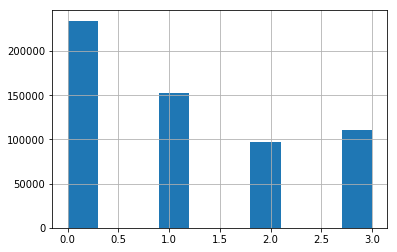

In [271]:
df_train1['ps_new_ind_06-09_cat'].hist()

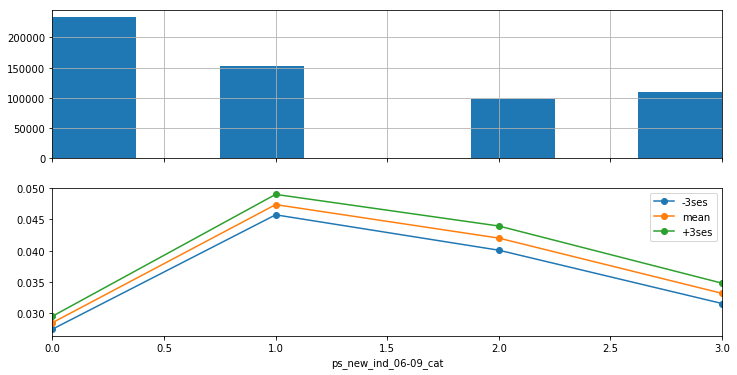

In [273]:
plot_mean_and_error_bound(df_train1, 'ps_new_ind_06-09_cat')

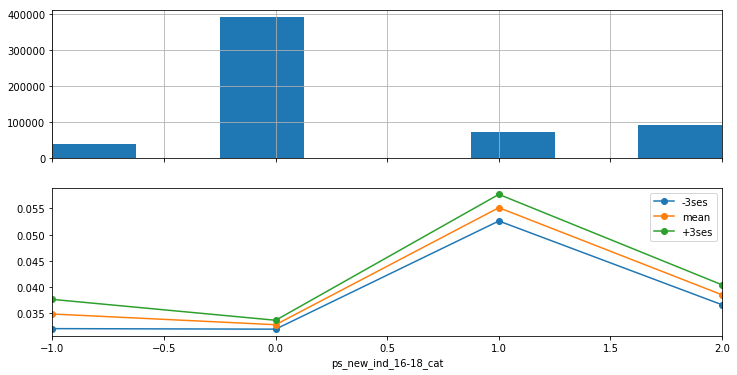

In [274]:
plot_mean_and_error_bound(df_train1, 'ps_new_ind_16-18_cat')

In [184]:

df = sorted(df, key=lambda x: (x[1],-x[2]), reverse=True)
df

[(1.3426699461767861, 1.4455718554819166, 6),
 (0.05094851486650824, 0.91037203539779721, 5),
 (0.43506657816229982, 0.37404768023312562, 1),
 (-0.86547761115351662, 0.29466228800608568, 0),
 (-0.095551629483991693, 0.25503857696806709, 9),
 (-0.80510752213953463, -0.25171455015158356, 3),
 (0.17385690785672883, -0.55058027848701674, 4),
 (1.6040666092059701, -1.1664369051783199, 7),
 (1.4947522856974229, -1.3190967164918652, 2),
 (-2.2642969673524331, -1.4545691064876425, 8)]

In [285]:
(0.296615 + 0.292476 + 0.271255 + 0.280646) / 4

0.285248

In [139]:
def check(s):
    n = len(s)
    for i in range(1, n+1):
        if n % i == 0:
            stop = True
            for j in range(n / i):
                if s[j*i:(j+1)*i] != s[:i]:
                    stop=False
                    break
            if stop:
                return n/i

In [108]:
x = [1] * 50
for i in range(1,50):
    x[i] = x[i-1] * 2
    

In [110]:
import numpy as np
x = np.cumsum(x)
x = x[x<1e9]

In [123]:
x = np.array([ 1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 131071, 262143, 524287, 1048575, 2097151, 4194303, 8388607, 16777215, 33554431, 67108863, 134217727, 268435455, 536870911])
y = np.array([ 1, 2, 4, 7, 12, 20, 33, 54, 88, 143, 232, 376, 609, 986, 1596, 2583, 4180, 6764, 10945, 17710, 28656, 46367, 75024, 121392, 196417, 317810, 514228, 832039, 1346268, 2178308, 3524577, 5702886, 9227464, 14930351, 24157816, 39088168, 63245985, 102334154, 165580140, 267914295, 433494436, 701408732])
def solution(n):
    return np.searchsorted(y, n, 'right') - np.searchsorted(x, n, 'left')

array([        2,         4,         8,        16,        32,        64,
             128,       256,       512,      1024,      2048,      4096,
            8192,     16384,     32768,     65536,    131072,    262144,
          524288,   1048576,   2097152,   4194304,   8388608,  16777216,
        33554432,  67108864, 134217728, 268435456])

In [124]:
134217728 + 268435456 + 536870911

939524095

In [116]:
solution(10)

1

In [93]:
x = np.array([1] * 50)
y = np.array([1] * 50
for

1

In [61]:
df_test = pd.read_csv('../data/test.csv')
# test_size = df_train.shape[0] * 3 / 10

In [38]:
sss = StratifiedShuffleSplit(n_splits=1, test_size = test_size)

In [39]:
gen = sss.split(X=df_train, y=df_train.target)

In [40]:
a_ind = gen.next()

In [41]:
a_ind[0].shape, a_ind[1].shape

((416649,), (178563,))

In [44]:
train = df_train[df_train.index.isin(a_ind)]

In [50]:
train = df_train.iloc[a_ind[0]]

In [51]:
test = df_train.iloc[a_ind[1]]

In [53]:
train.to_csv('../data/private_leaderboard/train.csv', index=False)

In [60]:
test.to_csv('../data/private_leaderboard/test.csv', index=False)

In [55]:
del test['target']

In [59]:
df_test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1
5,5,0,1,6,0,0,1,0,0,0,...,8,1,4,9,1,0,1,0,1,0
6,6,0,1,3,0,0,0,1,0,0,...,2,0,4,6,1,1,0,0,0,0
7,8,0,1,0,0,0,1,0,0,0,...,3,1,4,9,0,1,0,0,0,0
8,10,0,1,7,0,0,0,1,0,0,...,5,1,4,6,0,0,1,0,0,0
9,11,1,1,6,0,0,0,0,0,1,...,6,1,6,10,0,1,1,0,0,0
